[-0.63192313  0.77503107]


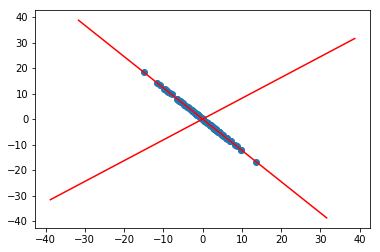

4.16145850457017e-06


In [13]:
import numpy as np
import matplotlib.pyplot as plt

x = np.empty((100,2))
np.random.seed(666)
x[:,0] = np.random.uniform(0.,100.,size=100)
x[:,1] = 0.75 * x[:,0] + 3. + np.random.normal(0, 10., size = 100)

def demean(x):#均值归零
    return x - np.mean(x,axis=0)#在行上求每一列的均值，并做减法,向量化

x_demean = demean(x)

def f(w,x):#效用函数
    return np.sum((x.dot(w))**2)/len(x)
def df(w,x):#效用函数的梯度函数
    return x.T.dot(x.dot(w))*2./len(x)

def direction(w):#让一个向量膜为1，即为单位向量
    return w / np.linalg.norm(w)#向量除以其模

def first_component(df, x, initial_w, eta, n_iters = 1e4, epsilon=1e-8):
    
    w = direction(initial_w) 
    cur_iter = 0

    while cur_iter < n_iters:
        gradient = df(w, x)
        last_w = w
        w = w + eta * gradient
        w = direction(w) # 注意1：每次求一个单位方向
        if(abs(f(w, x) - f(last_w, x)) < epsilon):
            break
        cur_iter += 1
    return w

initial_w = np.random.random((x.shape[1]))#初始值不能全为0，对于目标函数，w=0向量对应最小极值点，梯度也为0
eta = 0.01
w = first_component(df,x,initial_w,eta)

#求第二主成分，去掉第一主成分
x2 = np.empty(x.shape)
for i in range(len(x)):
    x2[i] = x[i] - x[i].dot(w)*w#x[i].dot(w)*w为x project，原向量与其相减即为去掉第一主成分以后的向量x2[i]
#向量化方法
#x2 = x-x.dot(w).reshape(-1,1)*w
    

plt.scatter(x2[:,0],x2[:,1])

w2 = first_component(df,x2,initial_w,eta)
print(w2)
plt.plot([-w[0]*50,w[0]*50],[-w[1]*50,w[1]*50],color='r')
plt.plot([-w2[0]*50,w2[0]*50],[-w2[1]*50,w2[1]*50],color='r')
plt.show()

#验证垂直
print(w.dot(w2)) #=0

In [17]:
def first_n_components(n,x,eta=0.01,n_iters=1e4,epsilon=1e-8):
    x_pca = x.copy()
    x_pca = demean(x_pca)
    res = []
    for i in range(n):
        initial_w = np.random.random((x.shape[1]))
        w = first_component(df,x_pca,initial_w,eta)
        res.append(w)
        x_pca = x_pca-x_pca.dot(w).reshape(-1,1)*w 
    return res

first_n_components(2,x)
        

[array([0.77660918, 0.62998269]), array([ 0.62998638, -0.77660618])]